In [1]:
from utils import read_images
from skimage import io
import numpy as np
import napari
import tifffile
import os
from pathlib import Path


In [2]:
# Define the directory containing your files
directory_path ="./data/test_data/"

# The following function will read all the images contained within the directory_path above
# and store them grouped by well_id.
images_per_well = read_images(directory_path)

In [3]:
# This is just a check, it prints the grouped z-stacks
for well_id, files in images_per_well.items():
    print(f'Well {well_id}:')
    for file_path in files:
        print(file_path)

Well A01:
data\test_data\D6_auto_Plate_M_p00_z00_0_A01f00d0.TIF
data\test_data\D6_auto_Plate_M_p00_z01_0_A01f00d0.TIF
data\test_data\D6_auto_Plate_M_p00_z02_0_A01f00d0.TIF
data\test_data\D6_auto_Plate_M_p00_z03_0_A01f00d0.TIF
data\test_data\D6_auto_Plate_M_p00_z04_0_A01f00d0.TIF
data\test_data\D6_auto_Plate_M_p00_z05_0_A01f00d0.TIF
data\test_data\D6_auto_Plate_M_p00_z06_0_A01f00d0.TIF
data\test_data\D6_auto_Plate_M_p00_z07_0_A01f00d0.TIF
data\test_data\D6_auto_Plate_M_p00_z08_0_A01f00d0.TIF
data\test_data\D6_auto_Plate_M_p00_z09_0_A01f00d0.TIF
data\test_data\D6_auto_Plate_M_p00_z10_0_A01f00d0.TIF
Well A02:
data\test_data\D6_auto_Plate_M_p00_z00_0_A02f00d0.TIF
data\test_data\D6_auto_Plate_M_p00_z01_0_A02f00d0.TIF
data\test_data\D6_auto_Plate_M_p00_z02_0_A02f00d0.TIF
data\test_data\D6_auto_Plate_M_p00_z03_0_A02f00d0.TIF
data\test_data\D6_auto_Plate_M_p00_z04_0_A02f00d0.TIF
data\test_data\D6_auto_Plate_M_p00_z05_0_A02f00d0.TIF
data\test_data\D6_auto_Plate_M_p00_z06_0_A02f00d0.TIF
data\tes

In [4]:
def min_intensity_projection(image_paths):
    
    # Load images from the specified paths
    image_collection = io.ImageCollection(image_paths)
    # Stack images into a single 3D numpy array
    stack = io.concatenate_images(image_collection)
    # Perform minimum intensity projection along the z-axis (axis=0)
    min_proj = np.min(stack, axis=0)
    
    return min_proj

def save_min_projection_imgs(images_per_well, output_dir="./output/MIN_projections"):
    
    for well_id, files in images_per_well.items():
        # Perform minimum intensity projection of the stack stored under well_id key
        min_proj = min_intensity_projection(images_per_well[well_id])
        
        # Create a directory to store the tif files if it doesn't exist
        Path(output_dir).mkdir(parents=True, exist_ok=True)
        
        # Construct the output file path
        output_path = os.path.join(output_dir, f"{well_id}.tif")
        
        # Save the resulting minimum projection
        tifffile.imwrite(output_path, min_proj)

In [5]:
save_min_projection_imgs(images_per_well)

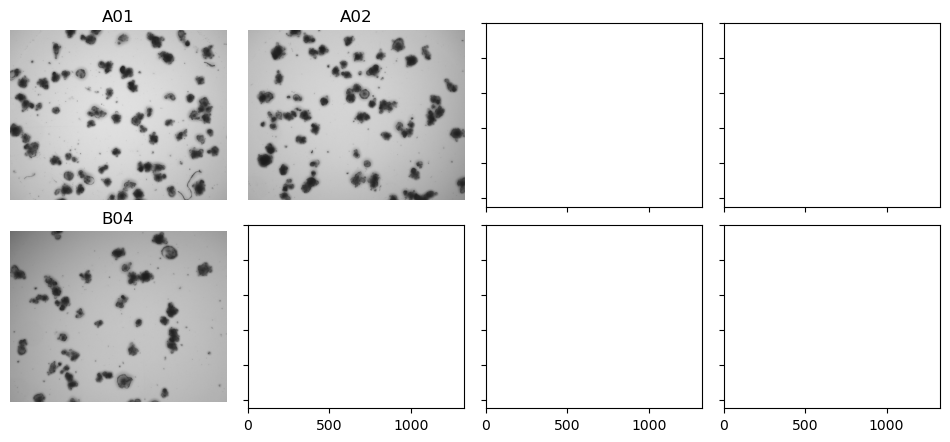

In [6]:
from utils import plot_plate

plot_plate(
    resolution=200,
    output_path="./output/organoid_minproj_plot.tif",
    img_folder_path="./output/MIN_projections/",
    )

In [8]:
from ultralytics import YOLO
import os 
from pathlib import Path
import tifffile
# Loading the latest model
model = YOLO("./models/GPU_1px_cle_eroded_labels.pt")

In [9]:
def predict(input_folder, model, conf_threshold=0.6, output_dir="./output/predictions"):
    # Define the directory containing your files
    directory_path = Path(input_folder)
    # Loop through all input images (minimum intensity projections)
    for image_path in directory_path.glob("*.tif"):
        
        # Get the filename without the extension
        filename = image_path.stem
        
        results = model.predict(image_path, conf=conf_threshold)  # Adjust confidence (conf) threshold

        im_array = results[0].plot(conf=False, labels=False, boxes=True, line_width=2)
        
        # Create a directory to store the tif files if it doesn't exist
        Path(output_dir).mkdir(parents=True, exist_ok=True)
        
        # Construct the output file path
        output_path = os.path.join(output_dir, f"{filename}.tif")
        
        # Save the resulting minimum projection
        tifffile.imwrite(output_path, im_array)

In [10]:
predict(input_folder="./output/MIN_projections", model=model)


image 1/1 c:\Users\albertds\Python_scripts\intestinal_organoid_brightfield_analysis\output\MIN_projections\A01.tif: 640x800 23 deads, 37 differentiateds, 4 undifferentiateds, 99.7ms
Speed: 0.0ms preprocess, 99.7ms inference, 52.1ms postprocess per image at shape (1, 3, 640, 800)

image 1/1 c:\Users\albertds\Python_scripts\intestinal_organoid_brightfield_analysis\output\MIN_projections\A02.tif: 640x800 16 deads, 33 differentiateds, 3 undifferentiateds, 83.0ms
Speed: 7.5ms preprocess, 83.0ms inference, 43.4ms postprocess per image at shape (1, 3, 640, 800)

image 1/1 c:\Users\albertds\Python_scripts\intestinal_organoid_brightfield_analysis\output\MIN_projections\B04.tif: 640x800 6 deads, 21 differentiateds, 4 undifferentiateds, 80.8ms
Speed: 2.0ms preprocess, 80.8ms inference, 20.3ms postprocess per image at shape (1, 3, 640, 800)


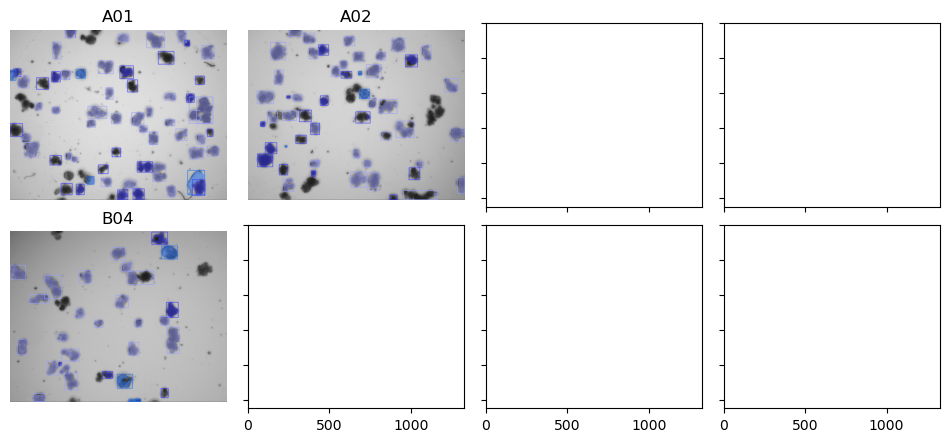

In [1]:
from utils import plot_plate

plot_plate(
    resolution=200,
    output_path="./output/organoid_predictions_plot.tif",
    img_folder_path="./output/predictions/",
    )